# <font color=blue> **Ciência dos Dados** - Projeto 1</font>
#### Beatriz Mie Kostubo Kuwabara </font>

### <u>Introdução</u>
Neste projeto foram feitas análises exploratórias de dados estatísticos dos países, correlacionando o Índice de Desenvolvimento Humano (IDH) com duas variáveis retiradas do site: https://www.gapminder.org/data/, utilizando os códigos aprendidos da biblioteca pandas.
#### Indicadores analisados:
- IDH
- Consumo de açúcar por pessoa (em grama por dia)
- Preço da gasolina (em US$ por litro)

#### Pergunta a ser respondida através da análise de dados:
Tendo em vista que o consumo de açúcar por pessoa (em gramas por dia) é maior em países com Índice de Desenvolvimento Humano mais elevado no ano de 2000, é possível associar tal relação com o alto preço da gasolina (em US$ por litro) nesses países?

### <u>Análises</u>

Importação das bibliotecas a serem utilizadas

In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Aqui foram abertos e lidos os arquivos dos dados em excel e salvos em variáveis:

In [16]:
index = pd.read_excel('indicator_HDI.xlsx')
sugar = pd.read_excel('indicator sugar_consumption.xlsx')
gas = pd.read_excel('indicator EP_PMP_SGAS_CD.xlsx')

In [20]:
index_idx = index.set_index('HDI')
sugar_idx = sugar.set_index('geo')
gas_idx = gas.set_index('geo')

#### Análise das três variáveis para o ano de 2000

In [21]:
index_2000 = index_idx.loc[:, [2000]]
sugar_2000 = sugar_idx.loc[:, [2000]]
gas_2000 = gas_idx.loc[:, [2000]]

In [22]:
ind = index_2000.rename(index=str, columns=lambda column: "HDI in " + str(column))
sug = sugar_2000.rename(index=str, columns=lambda column: "Sugar in " + str(column))
pump = gas_2000.rename(index=str, columns=lambda column: "Gas in " + str(column))

Os dados das três variáveis para o ano de 2000 foram juntados em um único dataframe:

In [23]:
df = ind.join(sug, how='inner')
data = df.join(pump, how="inner")

In [153]:
cd = data.dropna(how="any")

In [243]:
cd.to_csv('Projeto 1.csv', index=True)
cd.to_excel('Projeto 1.xlsx', index=True)

Para salvar os arquivos em formato .csv e .xlsx:

In [242]:
cd.describe()

,HDI in 2000,Sugar in 2000,Gas in 2000
count,121.000000,121.000000,121.000000
mean,0.618298,84.162397,0.627190
std,0.185380,44.809632,0.248097
min,0.224000,2.740000,0.050000
25%,0.451000,46.580000,0.460000
50%,0.634000,84.930000,0.620000
75%,0.770000,117.810000,0.770000
max,0.913000,194.520000,1.190000


Foram plotados boxplots com os dados das variáveis para o ano de 2000, afim de se verificar a ocorrência de outlayers, bem como as médias e medianas:

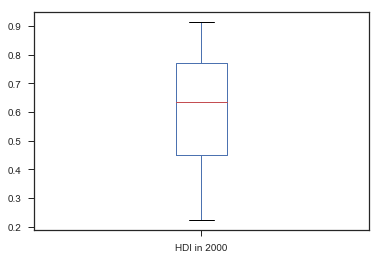

In [246]:
cd["HDI in 2000"].plot.box()

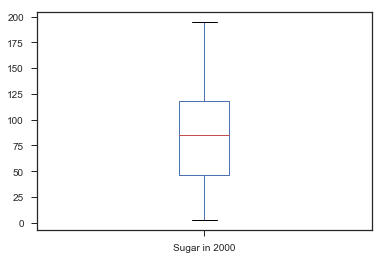

In [245]:
cd["Sugar in 2000"].plot.box()

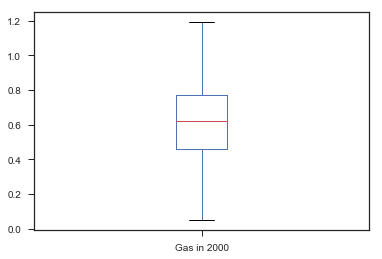

In [244]:
cd["Gas in 2000"].plot.box()

Aqui foi plotada a matriz de dispersão para o ano de 2000, que compara as três variáveis em gráficos de dispersão e histogramas:

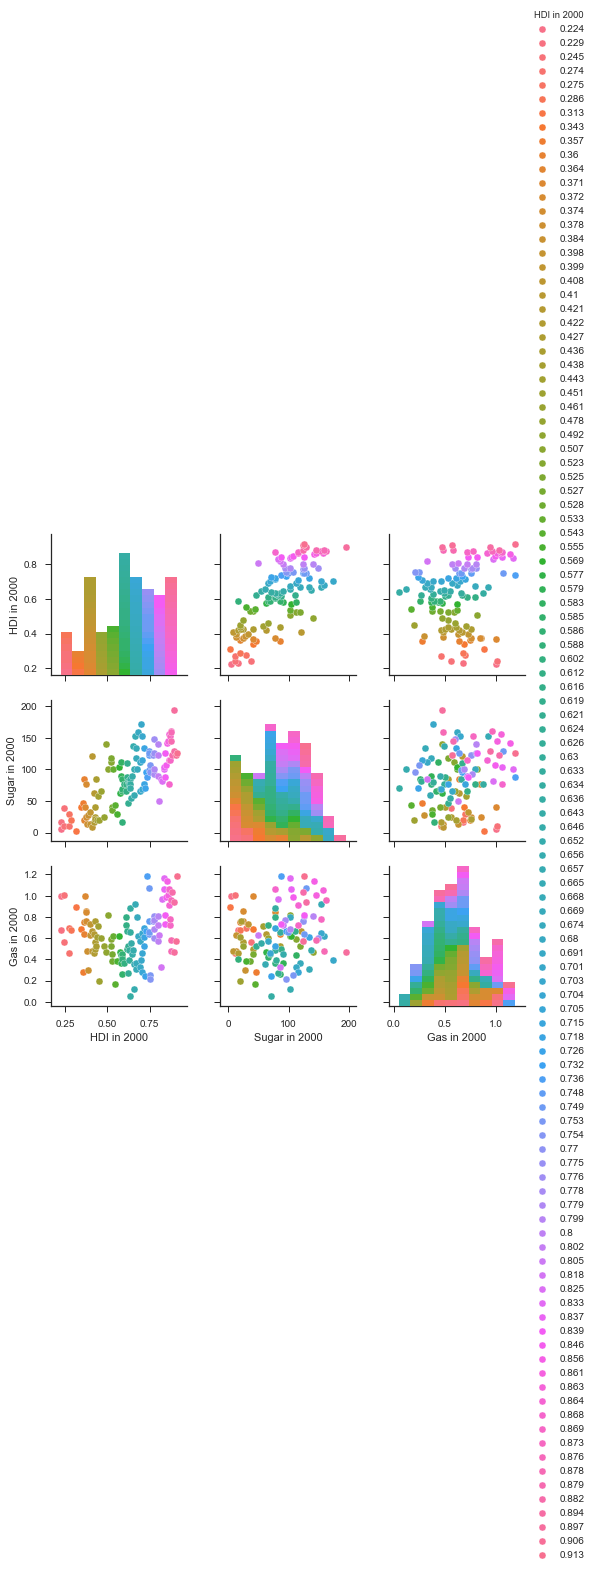

In [45]:
sns.set(style="ticks")
sns.pairplot(cd,hue="HDI in 2000")

Aqui foi plotada a matriz de regressão com a linha de tendência linear dos dados analisados:

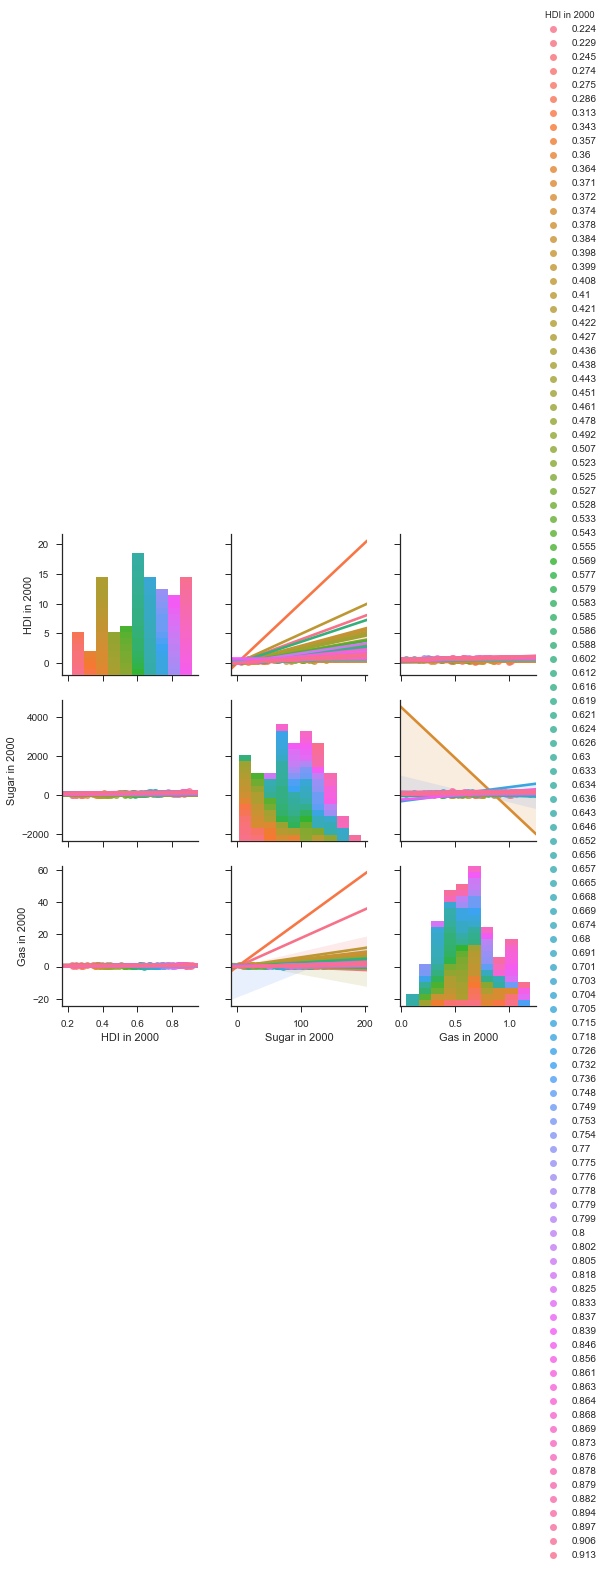

In [46]:
sns.set(style="ticks")
sns.pairplot(cd, kind="reg", hue="HDI in 2000")

Aqui foi calculada a correlação dos dados apresentados para as três variáveis:

In [47]:
cd.corr()

,HDI in 2000,Sugar in 2000,Gas in 2000
HDI in 2000,1.000000,0.754092,0.197566
Sugar in 2000,0.754092,1.000000,0.164330
Gas in 2000,0.197566,0.164330,1.000000


Foi definida a função que recebe os dados de duas variáveis em algum ano, e retorna o gráfico e a reta de tendência que relaciona tais dados:

In [218]:
def reta(dados_x, dados_y, nome_x, nome_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    sns.regplot(dados_x, dados_y, color=(c))
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=(c))

    plt.tight_layout()
    plt.grid()
    plt.show()

Gráficos relacionando as três variáveis, duas a duas, para o ano de 2000:

Ajuste linear entre  IDH   e  Consumo de Açúcar :
Coeficiente linear: -28.53920683841119
Coeficiente angular: 182.27730140679222


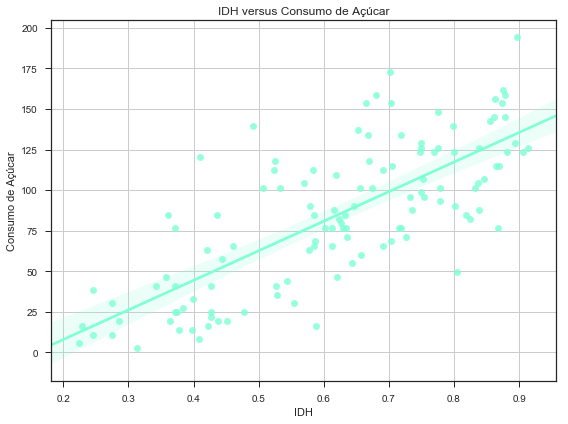

In [228]:
reta(cd["HDI in 2000"],cd["Sugar in 2000"],"IDH","Consumo de Açúcar", 'aquamarine')

Ajuste linear entre  IDH   e  Preço da Gasolina :
Coeficiente linear: 0.4637088929687034
Coeficiente angular: 0.26440537673145276


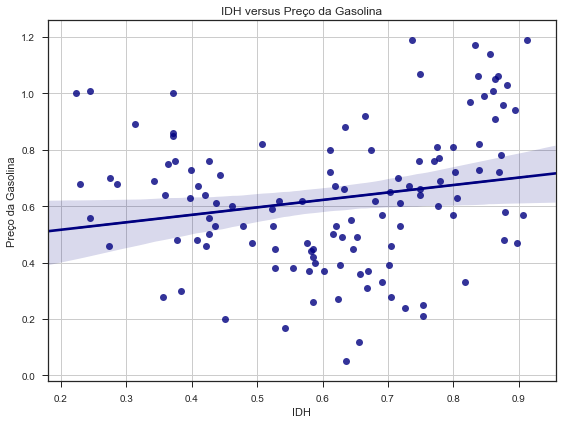

In [230]:
reta(cd["HDI in 2000"],cd["Gas in 2000"],"IDH","Preço da Gasolina", 'navy')

Ajuste linear entre  Consumo de Açúcar   e  Preço da Gasolina :
Coeficiente linear: 0.5506156458217112
Coeficiente angular: 0.0009098414379493559


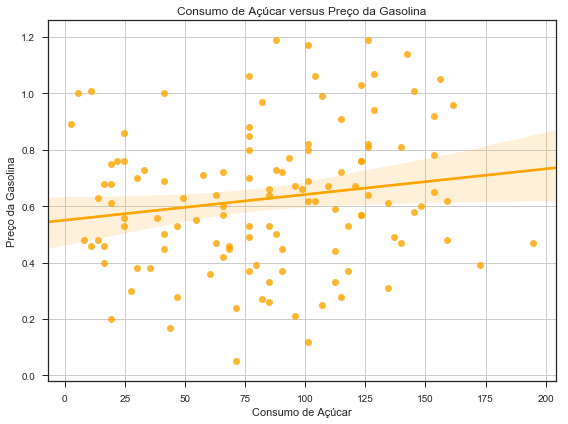

In [231]:
reta(cd["Sugar in 2000"],cd["Gas in 2000"],"Consumo de Açúcar","Preço da Gasolina", 'orange')

Foi plotado o gráfico que compara as três variáveis juntas:

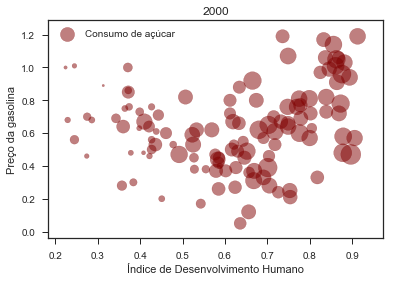

In [232]:
x = cd["HDI in 2000"]
y = cd["Gas in 2000"]
area = cd["Sugar in 2000"]/cd["Sugar in 2000"].max()* 400

plt.scatter(x, y, s=area, alpha=0.5, label = "Consumo de açúcar", color=('maroon'))
plt.title("2000")
plt.xlabel("Índice de Desenvolvimento Humano")
plt.ylabel("Preço da gasolina")
plt.legend()
plt.show()

    A partir das análises dos dados, é possível afirmar que 

#### Análise temporal das relações entre as variáveis

Relação entre o IDH e o consumo de açúcar no ano de 1990:

In [131]:
index_1990 = index_idx.loc[:, [1990]]
sugar_1990 = sugar_idx.loc[:, [1990]]

In [133]:
ind90 = index_1990.rename(index=str, columns=lambda column: "HDI in " + str(column))
sug90 = sugar_1990.rename(index=str, columns=lambda column: "Sugar in " + str(column))

In [134]:
df90 = ind90.join(sug90, how='inner')

In [136]:
cd90 = df90.dropna(how="any")

In [137]:
cd90.corr()

,HDI in 1990,Sugar in 1990
HDI in 1990,1.000000,0.743052
Sugar in 1990,0.743052,1.000000


Ajuste linear entre  IDH   e  Consumo de Açúcar :
Coeficiente linear: -23.172379108719355
Coeficiente angular: 182.2245594183183


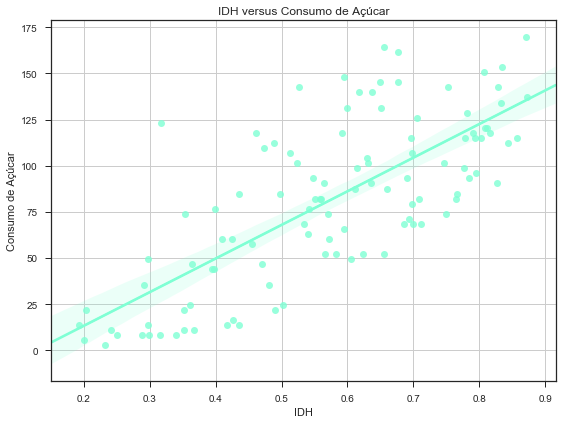

In [233]:
reta(cd90["HDI in 1990"],cd90["Sugar in 1990"],"IDH","Consumo de Açúcar","aquamarine")

Relação entre o IDH e o preço da gasolina no ano de 2006:

In [139]:
index_2006 = index_idx.loc[:, [2006]]
gas_2006 = gas_idx.loc[:, [2006]]

In [140]:
ind6 = index_2006.rename(index=str, columns=lambda column: "HDI in " + str(column))
pump6 = gas_2006.rename(index=str, columns=lambda column: "Gas in " + str(column))

In [141]:
df6 = ind6.join(pump6, how='inner')

In [143]:
cd6 = df6.dropna(how='any')

In [144]:
cd6.corr()

,HDI in 2006,Gas in 2006
HDI in 2006,1.000000,0.185915
Gas in 2006,0.185915,1.000000


Ajuste linear entre  IDH   e  Preço da gasolina :
Coeficiente linear: 0.7266698105253812
Coeficiente angular: 0.37713692363917783


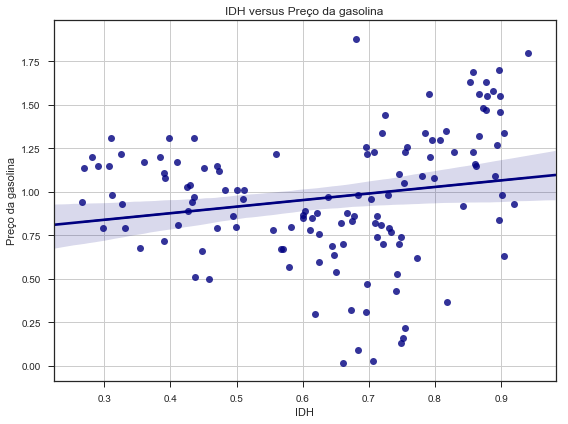

In [236]:
reta(cd6["HDI in 2006"],cd6["Gas in 2006"],"IDH","Preço da gasolina","navy")

Relação entre o consumo de açúcar e o preço da gasolina no ano de 2004:

In [123]:
sugar_2004 = sugar_idx.loc[:, [2004]]
gas_2004 = gas_idx.loc[:, [2004]]

In [124]:
sug4 = sugar_2004.rename(index=str, columns=lambda column: "Sugar in " + str(column))
pump4 = gas_2004.rename(index=str, columns=lambda column: "Gas in " + str(column))

In [125]:
df4 = sug4.join(pump4, how='inner')

In [147]:
cd4 = df4.dropna(how="any")

In [148]:
cd4.corr()

,Sugar in 2004,Gas in 2004
Sugar in 2004,1.000000,0.193704
Gas in 2004,0.193704,1.000000


Ajuste linear entre  Consumo de açúcar   e  Preço da gasolina :
Coeficiente linear: 0.7014454559764881
Coeficiente angular: 0.001554295488775247


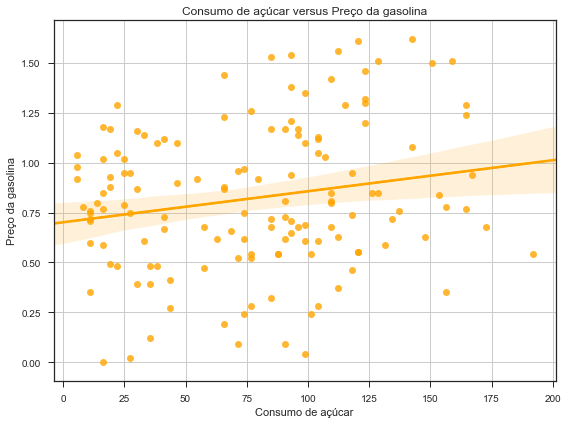

In [237]:
reta(cd4["Sugar in 2004"],cd4["Gas in 2004"],"Consumo de açúcar","Preço da gasolina","orange")